<a href="https://colab.research.google.com/github/larissapoghosyan/Capstone_Project/blob/main/Pyro_for_pp_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Pyro

In [ ]:
# !pip install http://download.pytorch.org/whl/cpu/torch-0.4.0-cp27-cp27mu-linux_x86_64.whl 
!pip3 install pyro-ppl

     |████████████████████████████████| 718 kB 14.5 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import nltk
import torch
torch.set_default_tensor_type(torch.FloatTensor) # set the default to float32
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score
import pyro
import pyro.distributions as dist
import pyro.infer
from pyro.infer import mcmc
from pyro.infer.autoguide.initialization import init_to_feasible
from pyro.infer.mcmc import nuts, MCMC
import h5py
import time
import warnings

## Label Encode

In [ ]:
dataset = pd.read_csv('/content/IMDb_Reviews.csv',engine='python', error_bad_lines=False)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
dataset.shape

(50000, 2)

In [ ]:
# Label Encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_fitted = le.fit_transform(dataset.iloc[:,1])
dataset.iloc[:,1] = le_fitted
label_col = np.array(dataset.iloc[:,1]).reshape(len(dataset),1)
label_col = label_col.astype(int)
label_col.shape

(50000, 1)

## Bert

In [ ]:
# no CLS token avg
hf_hidden = h5py.File('/content/bert_imdb_token_avg.h5', 'r')
br_lst_hidden = np.array(hf_hidden.get('bert_imdb_token_avg'))
hf_hidden.close()
print(br_lst_hidden.shape)

br_lst_hidden = np.append(br_lst_hidden,
                          label_col,
                          axis=1)

print(br_lst_hidden.shape)

(50000, 768)
(50000, 769)


In [ ]:
br_lst_hidden_df = pd.DataFrame(br_lst_hidden)
br_lst_hidden_prc20 = np.array(br_lst_hidden_df.sample(int(br_lst_hidden_df.shape[0]*0.2),
                                                       random_state=22
                                                       ))
print(br_lst_hidden_prc20.shape)

(10000, 769)


## RoBERT

In [ ]:
# no CLS token avg
hf_hidden = h5py.File('/content/robert_imdb_token_avg.h5', 'r')
rb_lst_hidden = np.array(hf_hidden.get('robert_imdb_token_avg'))
hf_hidden.close()
print(rb_lst_hidden.shape)

rb_lst_hidden = np.append(rb_lst_hidden,
                          label_col,
                          axis=1)

print(rb_lst_hidden.shape)

(50000, 768)
(50000, 769)


In [ ]:
rb_lst_hidden_df = pd.DataFrame(rb_lst_hidden)
rb_lst_hidden_prc20 = np.array(rb_lst_hidden_df.sample(int(rb_lst_hidden_df.shape[0]*0.2),
                                                       random_state=22
                                                       ))
print(rb_lst_hidden_prc20.shape)

(10000, 769)


## AlBERT

In [ ]:
# no CLS token avg
hf_hidden = h5py.File('/content/albert_imdb_token_avg.h5', 'r')
ab_lst_hidden = np.array(hf_hidden.get('albert_imdb_token_avg'))
hf_hidden.close()
print(ab_lst_hidden.shape)

ab_lst_hidden = np.append(ab_lst_hidden,
                          label_col,
                          axis=1)

print(ab_lst_hidden.shape)

(50000, 768)
(50000, 769)


In [ ]:
ab_lst_hidden_df = pd.DataFrame(ab_lst_hidden)
ab_lst_hidden_prc20 = np.array(ab_lst_hidden_df.sample(int(ab_lst_hidden_df.shape[0]*0.2),
                                                       random_state=22))
print(ab_lst_hidden_prc20.shape)

(10000, 769)


## Distil BERT

In [ ]:
# no CLS token avg
hf_hidden = h5py.File('/content/distilbert_imdb_token_avg.h5', 'r')
db_lst_hidden = np.array(hf_hidden.get('distilbert_imdb_token_avg'))
hf_hidden.close()
print(db_lst_hidden.shape)

db_lst_hidden = np.append(db_lst_hidden,
                          label_col,
                          axis=1)

print(db_lst_hidden.shape)

(50000, 768)
(50000, 769)


In [ ]:
db_lst_hidden_df = pd.DataFrame(db_lst_hidden)
db_lst_hidden_prc20 = np.array(db_lst_hidden_df.sample(int(db_lst_hidden_df.shape[0]*0.2),
                                                       random_state=22))
print(db_lst_hidden_prc20.shape)

(10000, 769)


## Tiny BERT

In [ ]:
# no CLS token avg
hf_hidden = h5py.File('/content/tinybert_imdb_token_avg.h5', 'r')
tb_lst_hidden = np.array(hf_hidden.get('tinybert_imdb_token_avg'))
hf_hidden.close()
print(tb_lst_hidden.shape)

tb_lst_hidden = np.append(tb_lst_hidden,
                          label_col, 
                          axis=1)

print(tb_lst_hidden.shape)

(50000, 768)
(50000, 769)


In [ ]:
tb_lst_hidden_df = pd.DataFrame(tb_lst_hidden)
tb_lst_hidden_prc20 = np.array(tb_lst_hidden_df.sample(int(tb_lst_hidden_df.shape[0]*0.2),
                                                       random_state=22))
print(tb_lst_hidden_prc20.shape)

(10000, 769)


## Sentence BERT

In [ ]:
# no CLS token avg
hf_hidden = h5py.File('/content/sentence_bert_imdb_token_avg.h5', 'r')
sb_lst_hidden = np.array(hf_hidden.get('sentence_bert_imdb_token_avg'))
hf_hidden.close()
print(sb_lst_hidden.shape)

sb_lst_hidden = np.append(sb_lst_hidden,
                          label_col,
                          axis=1)

print(sb_lst_hidden.shape)

(50000, 768)
(50000, 769)


In [ ]:
sb_lst_hidden_df = pd.DataFrame(sb_lst_hidden)
sb_lst_hidden_prc20 = np.array(sb_lst_hidden_df.sample(int(sb_lst_hidden_df.shape[0]*0.2),
                                                       random_state=22))
print(sb_lst_hidden_prc20.shape)

(10000, 769)


## Word2Vec

In [ ]:
hf_wv_ = h5py.File('/content/wv_vectors_imdb.h5', 'r')
embedding_wv = hf_wv_.get('vec_lis_hf')
embedding_wv = np.array(embedding_wv)
hf_wv_.close()

print(embedding_wv.shape)

(50000, 300)


In [ ]:
embedding_wv_full = np.append(embedding_wv,
                              label_col,
                              axis=1)

print(embedding_wv_full.shape)

(50000, 301)


In [ ]:
embedding_wv_df = pd.DataFrame(embedding_wv_full)
embedding_wv_sample = np.array(embedding_wv_df.sample(int(embedding_wv_df.shape[0]*0.2),
                                                       random_state=22))
print(embedding_wv_sample.shape)

(10000, 301)


## FastText

In [ ]:
hf_ft_ = h5py.File('/content/ft_vectors_imdb.h5', 'r')
embedding_ft = hf_ft_.get('vec_lis_hf')
embedding_ft = np.array(embedding_ft)
hf_ft_.close()

print(embedding_ft.shape)

(50000, 300)


In [ ]:
embedding_ft_full = np.append(embedding_ft,
                              label_col,
                              axis=1)
print(embedding_ft_full.shape)

(50000, 301)


In [ ]:
embedding_ft_df = pd.DataFrame(embedding_ft_full)
embedding_ft_sample = np.array(embedding_ft_df.sample(int(embedding_ft_df.shape[0]*0.2),
                                                       random_state=22))
print(embedding_ft_sample.shape)

(10000, 301)


## ELMo

In [ ]:
dataset_prc20 = np.array(dataset.sample(int(dataset.shape[0]*0.2),
                            random_state=22 ))

label_col_sample = dataset_prc20[:,-1].reshape(dataset_prc20.shape[0],1)

In [ ]:
hf_elmo = h5py.File('/content/drive/MyDrive/Lariba/IMDb/elmo_imdb_clf.h5', 'r')
hf_elmo_data = np.array(hf_elmo.get('elmo_imdb_clf'))
hf_elmo.close()

hf_elmo = np.append(hf_elmo_data,
                    label_col_sample, 
                    axis=1)

## Split data

In [ ]:
def Splitter(df):
  np.random.seed(0)
  msk = np.random.rand(len(df)) < 0.8
  train = df[msk]
  test = df[~msk]
  return(train, test)

In [ ]:
data = hf_elmo

training, testing = (Splitter(data)[0],
                     Splitter(data)[1])

train_hidden, train_lab_hidden = (training[:,:training.shape[1]-1],
                                  training[:,-1])
test_hidden, test_lab_hidden = (testing[:,:testing.shape[1]-1],
                                testing[:,-1])

train_hidden = train_hidden.astype('float64')
train_lab_hidden = train_lab_hidden.astype('int')
test_hidden = test_hidden.astype('float64')
test_lab_hidden = test_lab_hidden.astype('int')

## Tf_Idf

In [ ]:
# randomly sample 20% of the data
dataset_prc20 = np.array(dataset.sample(int(dataset.shape[0]*0.2),
                                                       random_state=22))
print(dataset_prc20.shape)

(10000, 2)


In [ ]:
data = np.array(dataset_prc20)

training, testing = (Splitter(data)[0],
                     Splitter(data)[1])

train_dat, train_lab = (training[:,:training.shape[1]-1],
                        training[:,-1])
test_dat, test_lab = (testing[:,:testing.shape[1]-1],
                      testing[:,-1])

train_lab = train_lab.astype('int')
test_lab = test_lab.astype('int')

Tf-IDf

In [ ]:
nltk.download('punkt')
vectorizer_tfidf = TfidfVectorizer(tokenizer=nltk.word_tokenize)

tf_train_tokens_sample = vectorizer_tfidf.fit_transform(train_dat[:,0])
tf_test_tokens_sample = vectorizer_tfidf.transform(test_dat[:,0])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## Wrap into a class

In [ ]:
def print_dict_items(dict_):
  for k, v in dict_.items():
    print(f"{k}: {tuple(v.shape)}")

In [ ]:
def plot_traces(mcmc_object):
  pyro_data = az.from_pyro(
    mcmc_object,
    prior=None,
    )
  with warnings.catch_warnings():
    az.plot_trace(
        pyro_data,
        compact=True,
        figsize=(12,7),
        divergences='bottom',
        kind='trace',
        )

In [ ]:
class Data_Sampler:
  def __init__(self, data, target):

    self.sample_number = 2000
    self.warmup = 1000
    self.posterior_trace = None
    self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Convert our data into pytorch tensors
    self.data = torch.tensor(data, dtype=torch.float32).to(self.device)
    self.target = torch.tensor(target, dtype=torch.float32).to(self.device)

    pyro.set_rng_seed(0)
        
  
  def model(self, data, target):
      data= self.data
      target=self.target
      # Define our intercept prior
      self.intercept_prior = dist.Normal(torch.tensor([0.0], device=self.device),
                                    torch.tensor([1.0], device=self.device))
      self.linear_combination = pyro.sample(f"beta_intercept", self.intercept_prior)
      
      # Also define coefficient priors
      self.coefficient_prior = dist.Normal(torch.zeros(self.data.shape[1], device=self.device),
                                          torch.ones(self.data.shape[1], device=self.device))
      self.beta_coef = pyro.sample("betas", self.coefficient_prior)
      # print(self.beta_coef.shape)
      # print(data.shape)

      self.linear_combination = torch.sigmoid(self.linear_combination + torch.matmul(self.data,self.beta_coef.T))
      # print(self.linear_combination)



      with pyro.plate("data", self.target.shape[0]):   ## plate keeps a group of random vars of the same shape, governed by the same prior
          self.outcome_dist = dist.Bernoulli(self.linear_combination)

          # Condition the expected mean on the observed target
          self.observation = pyro.sample("obs", self.outcome_dist, obs=self.target)

        
  def mcmc_sampler(self):
      torch.manual_seed(0)
      # Clear previous parameters
      pyro.clear_param_store()

      # Perform inference again
      nuts_kernel = pyro.infer.mcmc.NUTS(model=self.model, max_tree_depth=7)

      mcmc_object = pyro.infer.mcmc.api.MCMC(nuts_kernel,
                      num_samples=self.sample_number,
                      warmup_steps=self.warmup,
                      num_chains=2) ## add mp_context = 'spawn' when device = 'Cuda:0'
      
      start_time = time.time()
      self.posterior_trace = mcmc_object.run(self.data,
                                                self.target
                                                )
      self.posterior_samples = mcmc_object.get_samples()
      end_time = time.time()

      print(f'Inference ran for {round((end_time -  start_time)/60.0, 2)} minutes')
      
      return (mcmc_object, self.posterior_trace, self.posterior_samples)

  def predictive_dist(self, data): #give unseen data (validation set)

      data = torch.tensor(data, dtype=torch.float32).to(self.device)
      posterior_predictive = torch.sigmoid(self.posterior_samples['beta_intercept'].T + torch.matmul(data,self.posterior_samples['betas'].T))

      return posterior_predictive


## Sampler Class Objects

In [ ]:
bert_sampler_object = Data_Sampler(train_hidden, train_lab_hidden)
bert_mcmc_sampler = bert_sampler_object.mcmc_sampler()
bert_predictive_dist = bert_sampler_object.predictive_dist(test_hidden)
bert_mcmc_object = bert_mcmc_sampler[0]
bert_posterior_samples = bert_mcmc_sampler[2] 

In [ ]:
rb_sampler_object = Data_Sampler(train_hidden, train_lab_hidden)
rb_mcmc_sampler = rb_sampler_object.mcmc_sampler()
rb_predictive_dist = rb_sampler_object.predictive_dist(test_hidden)
rb_mcmc_object = rb_mcmc_sampler[0]
rb_posterior_samples = rb_mcmc_sampler[2]

In [ ]:
ab_sampler_object = Data_Sampler(train_hidden, train_lab_hidden)
ab_mcmc_sampler = ab_sampler_object.mcmc_sampler()
ab_predictive_dist = ab_sampler_object.predictive_dist(test_hidden)
ab_mcmc_object = ab_mcmc_sampler[0]
ab_posterior_samples = ab_mcmc_sampler[2]

In [ ]:
db_sampler_object = Data_Sampler(train_hidden, train_lab_hidden)
db_mcmc_sampler = db_sampler_object.mcmc_sampler()
db_predictive_dist = db_sampler_object.predictive_dist(test_hidden)
db_mcmc_object = db_mcmc_sampler[0]
db_posterior_samples = db_mcmc_sampler[2]

In [ ]:
tb_sampler_object = Data_Sampler(train_hidden, train_lab_hidden)
tb_mcmc_sampler = tb_sampler_object.mcmc_sampler()
tb_predictive_dist = tb_sampler_object.predictive_dist(test_hidden)
tb_mcmc_object = tb_mcmc_sampler[0]
tb_posterior_samples = tb_mcmc_sampler[2]

In [ ]:
sb_sampler_object = Data_Sampler(train_hidden, train_lab_hidden)
sb_mcmc_sampler = sb_sampler_object.mcmc_sampler()
sb_predictive_dist = sb_sampler_object.predictive_dist(test_hidden)
sb_mcmc_object = sb_mcmc_sampler[0]
sb_posterior_samples = sb_mcmc_sampler[2]

In [ ]:
wv_sampler_object = Data_Sampler(train_hidden, train_lab_hidden)
wv_mcmc_sampler = wv_sampler_object.mcmc_sampler()
wv_predictive_dist = wv_sampler_object.predictive_dist(test_hidden)
wv_mcmc_object = wv_mcmc_sampler[0]
wv_posterior_samples = wv_mcmc_sampler[2]

In [ ]:
ft_sampler_object = Data_Sampler(train_hidden, train_lab_hidden)
ft_mcmc_sampler = ft_sampler_object.mcmc_sampler()
ft_predictive_dist = ft_sampler_object.predictive_dist(test_hidden)
ft_mcmc_object = ft_mcmc_sampler[0]
ft_posterior_samples = ft_mcmc_sampler[2]

In [ ]:
tfidf_sampler_object = Data_Sampler(tf_train_tokens_sample.toarray(), train_lab)
tfidf_mcmc_sampler = tfidf_sampler_object.mcmc_sampler()
tfidf_predictive_dist = tfidf_sampler_object.predictive_dist(tf_test_tokens_sample.toarray())
tfidf_mcmc_object = tfidf_mcmc_sampler[0]
tfidf_posterior_samples = tfidf_mcmc_sampler[2]

In [ ]:
elmo_sampler_object = Data_Sampler(train_hidden, train_lab_hidden)
elmo_mcmc_sampler = elmo_sampler_object.mcmc_sampler()
elmo_predictive_dist = elmo_sampler_object.predictive_dist(test_hidden)
elmo_mcmc_object = elmo_mcmc_sampler[0]
elmo_posterior_samples = elmo_mcmc_sampler[2]

## Plotting

In [ ]:
print_dict_items(elmo_posterior_samples)

beta_intercept: (2000, 1)
betas: (2000, 3072)


In [ ]:
plot_traces(bert_mcmc_object)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  "Could not get vectorized trace, log_likelihood group will be omitted. "


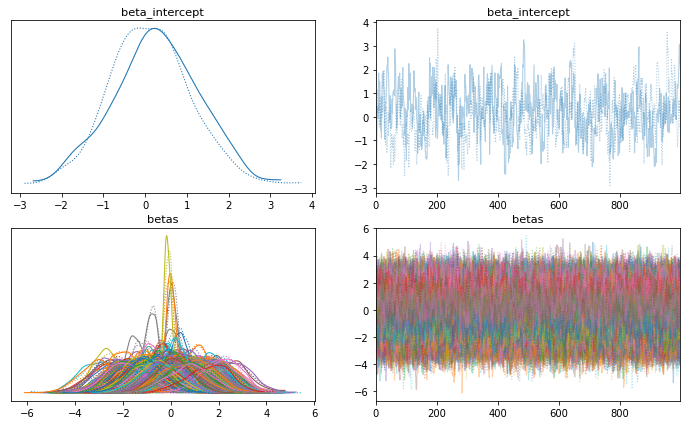

In [ ]:
plot_traces(rb_mcmc_object)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  "Could not get vectorized trace, log_likelihood group will be omitted. "
Warmup [0]:   0%|          | 11/3000 [2:20:17, 765.24s/it, step size=5.40e-06, acc. prob=0.524]


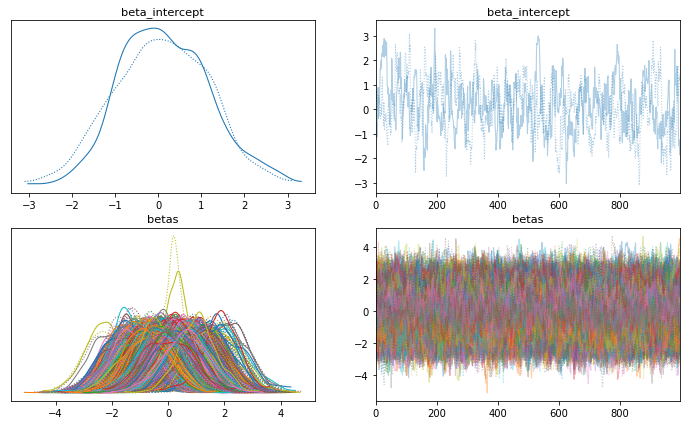

In [ ]:
plot_traces(db_mcmc_object)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  "Could not get vectorized trace, log_likelihood group will be omitted. "


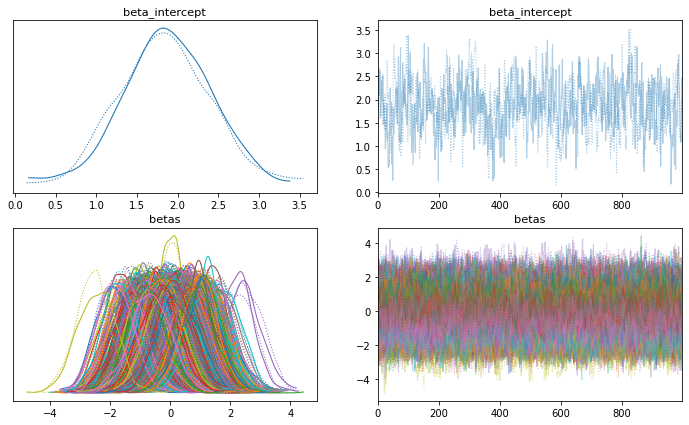

In [ ]:
plot_traces(tb_mcmc_object)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  "Could not get vectorized trace, log_likelihood group will be omitted. "


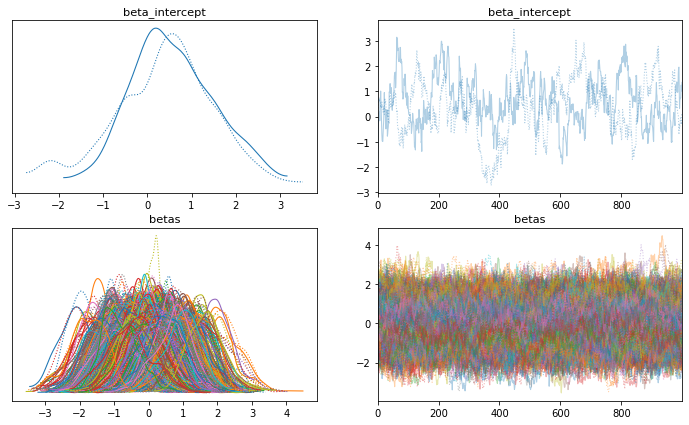

In [ ]:
plot_traces(sb_mcmc_object)

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  "Could not get vectorized trace, log_likelihood group will be omitted. "


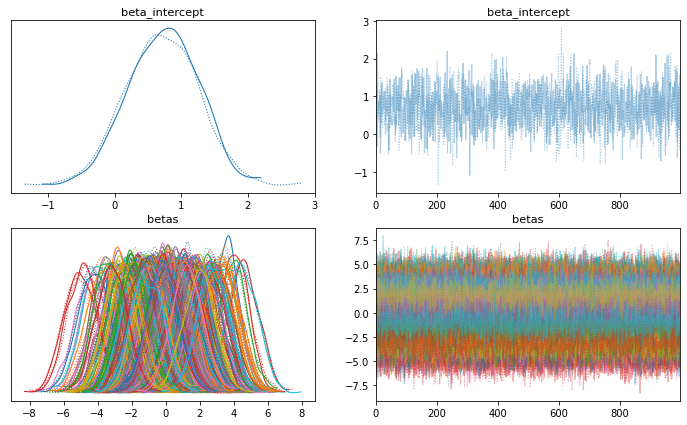

In [ ]:
plot_traces(wv_mcmc_object
            )

/usr/local/lib/python3.7/dist-packages/arviz/data/io_pyro.py:158: UserWarning: Could not get vectorized trace, log_likelihood group will be omitted. Check your model vectorization or set log_likelihood=False
  "Could not get vectorized trace, log_likelihood group will be omitted. "
Warmup [0]:   0%|          | 10/3000 [1:13:55, 443.59s/it, step size=1.54e-02, acc. prob=0.705]


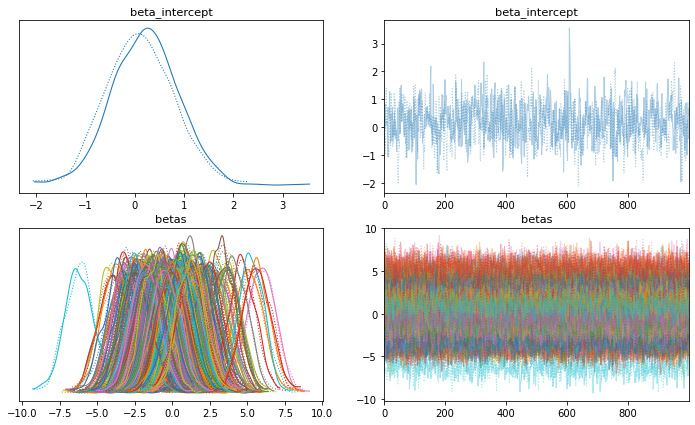

In [ ]:
plot_traces(ft_mcmc_object)

## Pred

In [ ]:
class Accuracy_dist:

  def __init__(self, predictive_dist):
      self.predictive_dist = predictive_dist


  def open_h5py_file(self, output_file):
      with h5py.File(output_file+'.h5', 'w') as hf_file:
        hf_file.create_dataset(output_file,
                                shape=(len(self.accuracy_dist),),
                                chunks=True,
                                dtype='float32'
                                )
        
  def predictive_dist_labels(self):
      predictive_dist_lab = self.predictive_dist.clone()
      predictive_dist_lab[predictive_dist_lab >= 0.5] = 1
      predictive_dist_lab[predictive_dist_lab < 0.5] = 0
      return predictive_dist_lab

  def accuracy_dist(self, test_labels, output_file):
      accuracy_dist = []
      predictive_dist_lab = self.predictive_dist_labels()
      for col in range(predictive_dist_lab.shape[1]):
        accuracy_dist.append(accuracy_score(y_true=test_labels,
                                            y_pred=predictive_dist_lab[:,col]
                                            )
        )
      with h5py.File(output_file+'.h5', 'a') as hf_file:
        accuracy_np = np.array(accuracy_dist)
        hf_file.create_dataset(
            output_file,
            data=accuracy_np,
            )
  


In [ ]:
config = {'output_file':{
    'bert': 'bert_accuracy_dist_IMDb',
    'robert': 'robert_accuracy_dist_IMDb',
    'albert': 'albert_accuracy_dist_IMDb',
    'distilbert': 'distilbert_accuracy_dist_IMDb',
    'tinybert': 'tinybert_accuracy_dist_IMDb',
    'sentence_bert': 'sentence_bert_accuracy_dist_IMDb',
    'word2vec': 'word2vec_accuracy_dist_IMDb',
    'fasttext': 'fasttext_accuracy_dist_IMDb',
    'tfidf': 'tfidf_accuracy_dist_IMDb',
    'elmo': 'elmo_accuracy_dist_IMDb'
      }
    }

In [ ]:
bert_acuracy = Accuracy_dist(bert_predictive_dist.cpu())
accruacy_bert_bert = bert_acuracy.accuracy_dist(test_labels = test_lab_hidden,
                                                output_file = config['output_file']['bert'])

In [ ]:
rb_acuracy = Accuracy_dist(rb_predictive_dist.cpu())
accruacy_rb = rb_acuracy.accuracy_dist(test_labels = test_lab_hidden,
                                       output_file = config['output_file']['robert'])

In [ ]:
db_acuracy = Accuracy_dist(db_predictive_dist.cpu())
accruacy_db = db_acuracy.accuracy_dist(test_labels = test_lab_hidden,
                                       output_file = config['output_file']['distilbert'])

In [ ]:
tb_acuracy = Accuracy_dist(tb_predictive_dist.cpu())
accruacy_tb = tb_acuracy.accuracy_dist(test_labels = test_lab_hidden,
                                       output_file = config['output_file']['tinybert'])

In [ ]:
sb_acuracy = Accuracy_dist(sb_predictive_dist.cpu())
accruacy_sb = sb_acuracy.accuracy_dist(test_labels = test_lab_hidden,
                                       output_file = config['output_file']['sentence_bert'])

In [ ]:
wv_acuracy = Accuracy_dist(wv_predictive_dist.cpu())
accruacy_wv = wv_acuracy.accuracy_dist(test_labels = test_lab_hidden,
                                       output_file = config['output_file']['word2vec'])

In [ ]:
ft_acuracy = Accuracy_dist(ft_predictive_dist.cpu())
accruacy_ft = ft_acuracy.accuracy_dist(test_labels = test_lab_hidden,
                                       output_file = config['output_file']['fasttext'])

In [ ]:
tfidf_acuracy = Accuracy_dist(tfidf_predictive_dist.cpu())
accruacy_tfidf = tfidf_acuracy.accuracy_dist(test_labels = test_lab,
                                       output_file = config['output_file']['tfidf'])

In [ ]:
elmo_acuracy = Accuracy_dist(elmo_predictive_dist.cpu())
accruacy_elmo = elmo_acuracy.accuracy_dist(test_labels = test_lab_hidden,
                                       output_file = config['output_file']['elmo'])

## Read

In [ ]:
import numpy as np
hf_bert_token_avg = h5py.File('/content/bert_accuracy_dist_IMDb.h5', 'r')
bert_token_avg_acc = np.array(hf_bert_token_avg.get('bert_accuracy_dist_IMDb'))
hf_bert_token_avg.close()

In [ ]:
hf_rb_token_avg = h5py.File('/content/robert_accuracy_dist_IMDb.h5', 'r')
rb_token_avg_acc = np.array(hf_rb_token_avg.get('robert_accuracy_dist_IMDb'))
hf_rb_token_avg.close()

In [ ]:
hf_db_token_avg = h5py.File('/content/distilbert_accuracy_dist_IMDb.h5', 'r')
db_token_avg_acc = np.array(hf_db_token_avg.get('distilbert_accuracy_dist_IMDb'))
hf_db_token_avg.close()

In [ ]:
hf_tb_token_avg = h5py.File('/content/tinybert_accuracy_dist_IMDb.h5', 'r')
tb_token_avg_acc = np.array(hf_tb_token_avg.get('tinybert_accuracy_dist_IMDb'))
hf_tb_token_avg.close()

In [ ]:
hf_sb_token_avg = h5py.File('/content/sentence_bert_accuracy_dist_IMDb.h5', 'r')
sb_token_avg_acc = np.array(hf_sb_token_avg.get('sentence_bert_accuracy_dist_IMDb'))
hf_sb_token_avg.close()

In [ ]:
hf_wv_accuracy_dist = h5py.File('/content/word2vec_accuracy_dist_IMDb.h5', 'r')
wv_accuracy_dist = np.array(hf_wv_accuracy_dist.get('word2vec_accuracy_dist_IMDb'))
hf_wv_accuracy_dist.close()

In [ ]:
hf_ft_accuracy_dist = h5py.File('/content/fasttext_accuracy_dist_IMDb.h5', 'r')
ft_accuracy_dist = np.array(hf_ft_accuracy_dist.get('fasttext_accuracy_dist_IMDb'))
hf_ft_accuracy_dist.close()

In [ ]:
hf_tfidf_accuracy_dist = h5py.File('/content/tfidf_accuracy_dist_IMDb.h5', 'r')
tfidf_accuracy_dist = np.array(hf_tfidf_accuracy_dist.get('tfidf_accuracy_dist_IMDb'))
hf_tfidf_accuracy_dist.close()

In [ ]:
hf_elmo_accuracy_dist = h5py.File('/content/elmo_accuracy_dist_IMDb.h5', 'r')
elmo_accuracy_dist = np.array(hf_elmo_accuracy_dist.get('elmo_accuracy_dist_IMDb'))
hf_elmo_accuracy_dist.close()

## KDEplots of each distribution

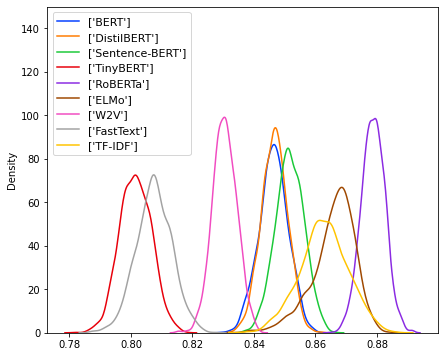

In [ ]:
f, axs = plt.subplots(1,1,figsize=(7,6))
sns.set_palette("bright",9)
sns.kdeplot(x = bert_token_avg_acc, label=['BERT'])
sns.kdeplot(x = db_token_avg_acc, label=['DistilBERT'])
sns.kdeplot(x = sb_token_avg_acc, label=['Sentence-BERT'])
sns.kdeplot(x = tb_token_avg_acc, label=['TinyBERT'])
sns.kdeplot(x = rb_token_avg_acc, label=['RoBERTa'])
sns.kdeplot(x = elmo_accuracy_dist, label=['ELMo'])
sns.kdeplot(x = wv_accuracy_dist, label=['W2V'])
sns.kdeplot(x = ft_accuracy_dist, label=['FastText'])
sns.kdeplot(x = tfidf_accuracy_dist, label=['TF-IDF'])
plt.ylim((0,150))
plt.legend(loc=2, prop={'size': 11})

## Pairwise Difference Comparison 

In [ ]:
np.random.seed(22)
br_sample = np.random.choice(
    bert_token_avg_acc,
    size=10000,
    replace=True,
    )
rb_sample = np.random.choice(
    rb_token_avg_acc,
    size=10000,
    replace=True,
    )
db_sample = np.random.choice(
    db_token_avg_acc,
    size=10000,
    replace=True,
    )
tb_sample = np.random.choice(
    tb_token_avg_acc,
    size=10000,
    replace=True,
    )
sb_sample = np.random.choice(
    sb_token_avg_acc,
    size=10000,
    replace=True,
    )
wv_sample = np.random.choice(
    wv_accuracy_dist,
    size=10000,
    replace=True,
    )
ft_sample = np.random.choice(
    ft_accuracy_dist,
    size=10000,
    replace=True,
    )
tfidf_sample = np.random.choice(
    tfidf_accuracy_dist,
    size=10000,
    replace=True,
    )
elmo_sample = np.random.choice(
    elmo_accuracy_dist,
    size=10000,
    replace=True,
    )

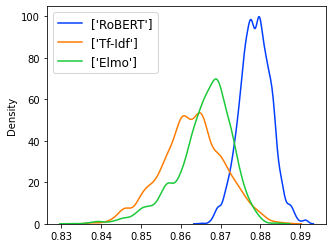

In [ ]:
f, axs = plt.subplots(1,1, figsize=(5,4))

sns.kdeplot(
    x = rb_sample,
    label=['RoBERT'],
    )
sns.kdeplot(
    x = tfidf_sample,
    label=['Tf-Idf'],
    )
sns.kdeplot(
    x = elmo_sample,
    label=['Elmo'],
    )
plt.legend(
    loc=2, 
    prop={'size':12},
    )

In [ ]:
# difference dists
dif_tf_rb = tfidf_sample - rb_sample
dif_elmo_rb = elmo_sample - rb_sample
dif_elmo_tfidf = elmo_sample - tfidf_sample

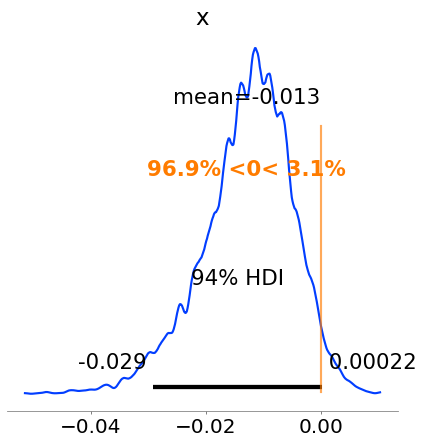

In [ ]:
az.plot_posterior(
    dif_elmo_rb,
    ref_val=0,
    figsize = (7,7),
    )

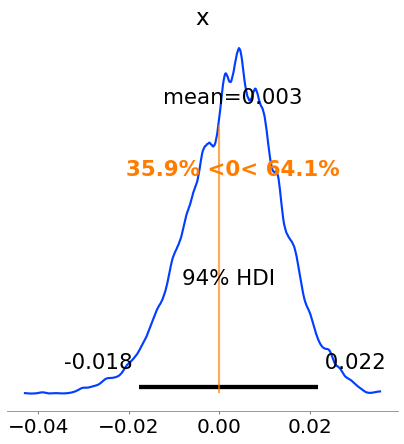

In [ ]:
az.plot_posterior(
    dif_elmo_tfidf,
    ref_val=0,
    figsize = (7,7),
    )

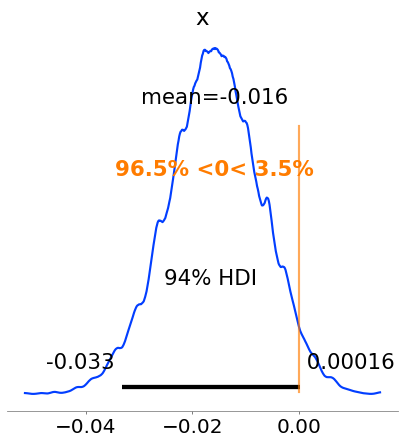

In [ ]:
az.plot_posterior(
    dif_tf_rb,
    ref_val=0,
    figsize = (7,7),
    )